The below code pulls data from the NOAA API to analyze weather trends across 7 different weather events.

In [1]:
# import dependenices
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import noaa_key

In [2]:
#Fetch data from the GSOM dataset (Global Summary of the Month) for GHCND station USC00010008, for May of 2010 with standard units

#https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid=GHCND:USC00010008&units=standard&startdate=2010-05-01&enddate=2010-05-31

base_url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM'
headers = {'token': noaa_key}
units = 'standard'


In [3]:
# Function to highlight max values in graphs

def annot_max(x,y, ax=None):
    
    xmax = x[np.argmax(y)]
    ymax = y.max()
   # text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    text= "y={:.3f}".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

In [4]:
# Heat wave data, Oshkosh, Nebraska (2012-01-01 to 2012-12-31)

# Heat wave variables
hw_start_date = '2008-06-01'
hw_end_date = '2015-06-01'
hw_location = 'GHCND:USC00252000'

#EMXT = Extreme maximum temperature for month
data_type_id = 'EMXT'

url = f'{base_url}&stationid={hw_location}&units={units}&startdate={hw_start_date}&enddate={hw_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
#print(json.dumps(response, indent=4, sort_keys=True))
hwData = pd.DataFrame(response['results'])
#hwData

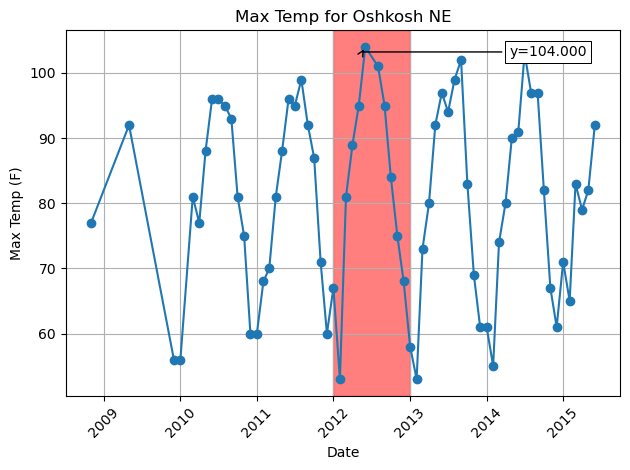

In [5]:
hwData['date'] = pd.to_datetime(hwData['date'])
dates = hwData['date']
values = hwData['value']

plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Max Temp for Oshkosh NE')
plt.xlabel('Date')
plt.ylabel('Max Temp (F)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvspan('2012-01-01', '2012-12-31', color='red', alpha=0.5)
annot_max(dates,values)
plt.savefig("Heat Wave.png")
plt.show()


In [28]:
# Flooding wave data, Indianapolis, Indiana (2008-04-01 to 2008-06-30)

# Flooding variables
flood_start_date = '2006-01-01'
flood_end_date = '2010-12-30'
flood_location = 'GHCND:USW00093819'

# DP1X = Number of days with >= 1.00 inch/25.4 millimeters in the month.
# DP10 = Number of days with >= 0.1 inch
data_type_id = 'DP10'

url = f'{base_url}&stationid={flood_location}&units={units}&startdate={flood_start_date}&enddate={flood_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
#print(json.dumps(response, indent=4, sort_keys=True))
floodData = pd.DataFrame(response['results'])
#floodData
print(url)

https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid=GHCND:USW00093819&units=standard&startdate=2006-01-01&enddate=2010-12-30&datatypeid=DP10&limit=1000


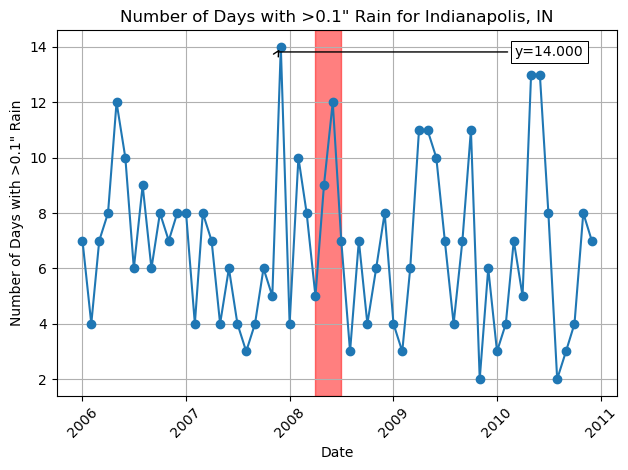

<Figure size 1500x600 with 0 Axes>

In [60]:
floodData['date'] = pd.to_datetime(floodData['date'])
dates = floodData['date']
values = floodData['value']

plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Number of Days with >0.1" Rain for Indianapolis, IN')
plt.xlabel('Date')
plt.ylabel('Number of Days with >0.1" Rain')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvspan('2008-04-01', '2008-06-30', color='red', alpha=0.5)
annot_max(dates,values)
plt.figure(figsize=(15,6))
plt.savefig("Flood.png")
plt.show()


In [8]:
# Freeze data, Knoxville, Tennessee (2007-04-04 to 2007-04-10)

# Freeze variables
freeze_start_date = '2005-01-04'
freeze_end_date = '2009-12-10'
freeze_location = 'GHCND:USR0000TBLE'

#EMNT = Extreme minimum temperature for month
data_type_id = 'EMNT'

url = f'{base_url}&stationid={freeze_location}&units={units}&startdate={freeze_start_date}&enddate={freeze_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
#print(json.dumps(response, indent=4, sort_keys=True))
freezeData = pd.DataFrame(response['results'])
#freezeData

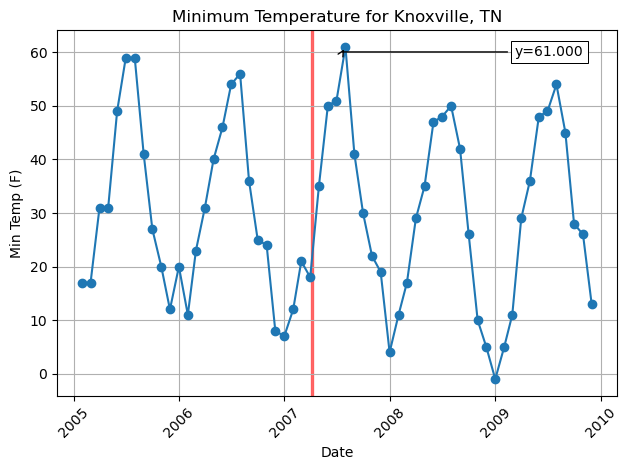

In [9]:
freezeData['date'] = pd.to_datetime(freezeData['date'])
dates = freezeData['date']
values = freezeData['value']

plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Minimum Temperature for Knoxville, TN')
plt.xlabel('Date')
plt.ylabel('Min Temp (F)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvspan('2007-04-04', '2007-04-10', color='red', alpha=0.5)
annot_max(dates,values)
plt.savefig("Freeze.png")
plt.show()


In [10]:
# Tornado data, Joplin, Missouri (2011-04-25 to 2011-04-28)

# Tornado Variables
tor_start_date = '2011-03-25'
tor_end_date = '2011-05-28'
tor_location = 'GHCND:US1MONW0004'

# "AWND" = Monthly Average Wind Speed. Given in miles per hour
data_type_id = 'EMNT'

url = f'{base_url}&stationid={tor_location}&units={units}&startdate={tor_start_date}&enddate={tor_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
print(json.dumps(response, indent=4, sort_keys=True))
#torData = pd.DataFrame(response['results'])
#torData

{}


In [11]:
# Hurricane data, New Orleans, Louisiana (2005-08-25 to 2005-08-30)

# Hurricane variables
hur_start_date = '2003-01-01'
hur_end_date = '2008-12-30'
hur_location = 'GHCND:USW00012916'

# "AWND" = Monthly Average Wind Speed. Given in miles per hour o
data_type_id = 'AWND'

url = f'{base_url}&stationid={hur_location}&units={units}&startdate={hur_start_date}&enddate={hur_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
#print(json.dumps(response, indent=4, sort_keys=True))
hurData = pd.DataFrame(response['results'])
#hurData

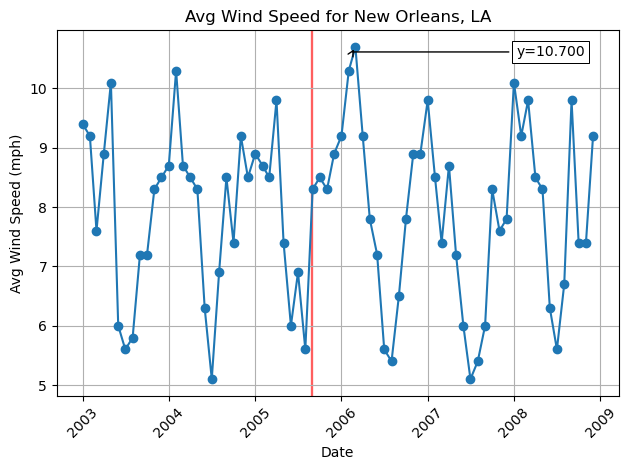

In [12]:
hurData['date'] = pd.to_datetime(hurData['date'])
dates = hurData['date']
values = hurData['value']

plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Avg Wind Speed for New Orleans, LA')
plt.xlabel('Date')
plt.ylabel('Avg Wind Speed (mph)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvspan('2005-08-25', '2005-08-30', color='red', alpha=0.5)
annot_max(dates,values)
plt.savefig("Hurricane.png")
plt.show()

In [22]:
# Wildfire data, Paradise, California (2018-06-01 to 2018-12-31)

# Wildfire variables
fire_start_date = '2016-01-01'
fire_end_date = '2020-12-31'
#fire_location = 'GHCND:USC00046685' # Paradise
#fire_location = 'GHCND:USC00041715' # Chico
fire_location = 'GHCND:USW00093210' # Chico 2

#EMXT = Extreme maximum temperature for month
data_type_id = 'EMXT'

url = f'{base_url}&stationid={fire_location}&units={units}&startdate={fire_start_date}&enddate={fire_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
#print(json.dumps(response, indent=4, sort_keys=True))
fireData = pd.DataFrame(response['results'])
#fireData

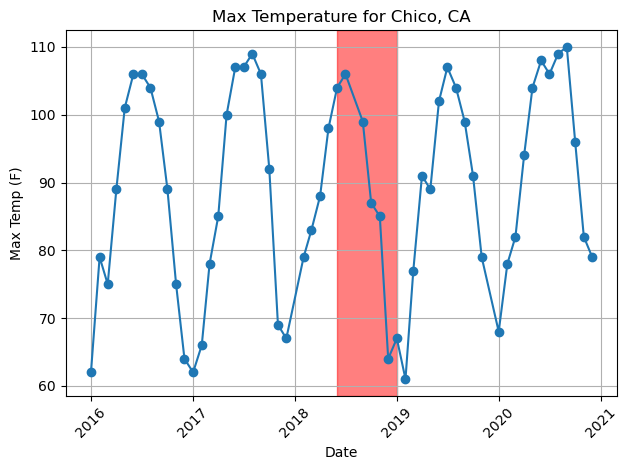

In [46]:
fireData['date'] = pd.to_datetime(fireData['date'])
dates = fireData['date']
values = fireData['value']

plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Max Temperature for Chico, CA')
plt.xlabel('Date')
plt.ylabel('Max Temp (F)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvspan('2018-06-01', '2018-12-31', color='red', alpha=0.5)
#annot_max(dates,values)
plt.savefig("Wildfire.png")
plt.show()


In [59]:
# Wildfire data, Paradise, California (2018-06-01 to 2018-12-31)

# Wildfire variables
fire_start_date = '2016-01-01'
fire_end_date = '2020-12-31'
#fire_location = 'GHCND:USC00046685' # Paradise
#fire_location = 'GHCND:USR0000CCOH' # Paradise 2
#fire_location = 'GHCND:USC00041715' # Chico
fire_location = 'GHCND:USW00093210' # Chico 2

## AWND = Monthly Average Wind Speed. Given in miles per hour o

data_type_id = 'AWND'

url = f'{base_url}&stationid={fire_location}&units={units}&startdate={fire_start_date}&enddate={fire_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
#print(json.dumps(response, indent=4, sort_keys=True))
fireData_wind = pd.DataFrame(response['results'])
print(url)
#fireData

https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid=GHCND:USW00093210&units=standard&startdate=2016-01-01&enddate=2020-12-31&datatypeid=AWND&limit=1000


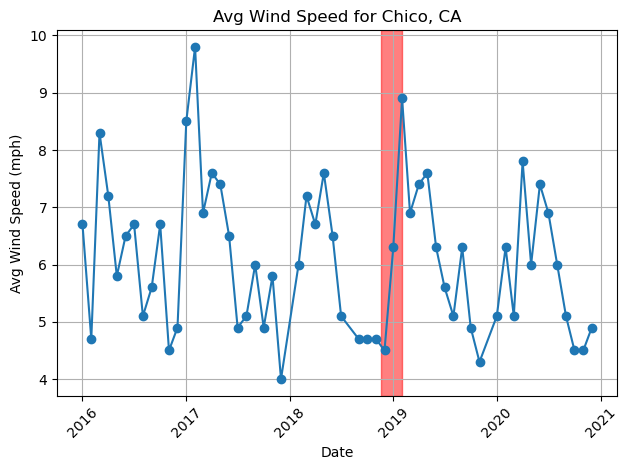

In [58]:
fireData_wind['date'] = pd.to_datetime(fireData['date'])
dates = fireData_wind['date']
values = fireData_wind['value']

plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Avg Wind Speed for Chico, CA')
plt.xlabel('Date')
plt.ylabel('Avg Wind Speed (mph)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvspan('2018-11-18', '2019-01-31', color='red', alpha=0.5)
#annot_max(dates,values)
plt.savefig("Wildfire_wind.png")
plt.show()


In [15]:
# Winter Storm data, Seattle, WA (2021-02-10 to 2021-02-19)

# Winter Storm variables
ws_start_date = '2019-01-01'
ws_end_date = '2023-01-01'
ws_location = 'GHCND:USW00024233'

#"DSNW" = Number of days with snowfall >= 1 inch
data_type_id = 'DSNW'

url = f'{base_url}&stationid={ws_location}&units={units}&startdate={ws_start_date}&enddate={ws_end_date}&datatypeid={data_type_id}&limit=1000'

response = requests.get(url, headers = headers)
response = response.json()
#print(json.dumps(response, indent=4, sort_keys=True))
wsData = pd.DataFrame(response['results'])
#wsData

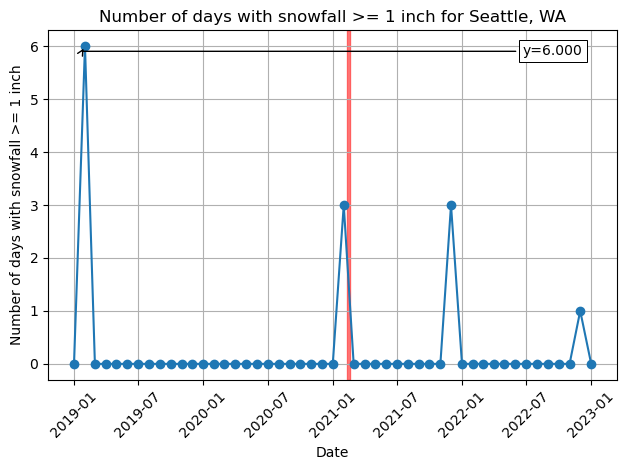

In [16]:
wsData['date'] = pd.to_datetime(wsData['date'])
dates = wsData['date']
values = wsData['value']

plt.plot(dates, values, marker='o', linestyle='-')
plt.title('Number of days with snowfall >= 1 inch for Seattle, WA')
plt.xlabel('Date')
plt.ylabel('Number of days with snowfall >= 1 inch')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.axvspan('2021-02-10', '2021-02-19', color='red', alpha=0.5)
annot_max(dates,values)
plt.savefig("Winter Storm.png")
plt.show()
